In [24]:
import sys 
import os
import pandas as pd
ozon_bots_path = '/home/ekolodyazhnaya/shared'
sys.path.insert(0, ozon_bots_path)
current_filepath = os.path.abspath('/home/ekolodyazhnaya/ontime')
dir_path = os.path.dirname('/home/ekolodyazhnaya/ontime')
sql_dirname = os.path.join(dir_path, 'old_projects/tracker_sql_scripts')
sys.path.append(dir_path)
from clickhouse_driver import Client
from shared_utils import logger
import sqlalchemy as sa
from shared_utils import logger
import sqlalchemy as sa

In [23]:
pip install pandas


Looking in indexes: https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/simple
  Using cached https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/3e/0c/23764c4635dcb0a784a787498d56847b90ebf974e65f4ab4053a5d97b1a5/pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 68.1 MB/s eta 0:00:00
  Using cached https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/6d/ad/ff3b21ebfe79a4d25b4a4f8e5cf9fd44a204adb6b33c09010f566f51027a/numpy-1.21.6-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.5.3 requires pyparsing>=2.2.1, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install seaborn

Looking in indexes: https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/simple
  Using cached https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/8f/2e/17bbb83fbf102687bb2aa3d808add39da820a7698159302a1a69bb82e01c/seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/pyparsing/3.1.1/pyparsing-3.1.1-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [40]:
import seaborn as sns  

AttributeError: module 'matplotlib' has no attribute 'get_data_path'

In [ ]:
pip install seaborn

In [31]:
df = pd.read_excel('/home/ekolodyazhnaya/claims_sample_data.xlsx')


In [ ]:
df

In [32]:
df_unrecog_data = df[df['MONTH'] == 201900]

In [33]:
df = df[df['MONTH'] != 201900]

In [32]:
df.MONTH
df = df[df['MONTH'] != 201900]
df.MONTH = pd.to_datetime(df['MONTH'].astype(str), format='%Y%m')

In [33]:
df

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
0,2018-01-01,AncillaryFFS,NaN,Payer F,4281
1,2018-01-01,AncillaryFFS,NaN,Payer H,2221
2,2018-01-01,AncillaryFFS,NaN,Payer O,3937
3,2018-01-01,AncillaryFFS,NaN,Payer W,268
4,2018-01-01,AncillaryFFS,ACH,Payer W,151
...,...,...,...,...,...
52147,2020-07-01,SpecialistsFFS,RADIATION ONCOLOGY,Payer F,869
52148,2020-07-01,SpecialistsFFS,REGISTERED NURSE,Payer H,99
52149,2020-07-01,SpecialistsFFS,RHEUMATOLOGY,Payer F,536
52150,2020-07-01,SpecialistsFFS,SPECIAL SERVICES,Payer H,1064


In [36]:
df.dtypes

MONTH               datetime64[ns]
SERVICE_CATEGORY            object
CLAIM_SPECIALTY             object
PAYER                       object
PAID_AMOUNT                float64
dtype: object

In [37]:
df.shape
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [38]:
print(df.isnull().sum())

MONTH                 0
SERVICE_CATEGORY      0
CLAIM_SPECIALTY     251
PAYER                 0
PAID_AMOUNT           0
dtype: int64


In [39]:
sns.boxplot(x=df['PAID_AMOUNT'])

NameError: name 'sns' is not defined

In [ ]:
df.PAYER.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of payer")
plt.ylabel('Number of payer')
plt.xlabel('payer');

In [ ]:
df.SERVICE_CATEGORY.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of SERVICE_CATEGORY")
plt.ylabel('Number of SERVICE_CATEGORY')
plt.xlabel('SERVICE_CATEGORY');

In [ ]:
df.CLAIM_SPECIALTY.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of CLAIM_SPECIALTY")
plt.ylabel('Number of CLAIM_SPECIALTY')
plt.xlabel('CLAIM_SPECIALTY');

In [ ]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['PAYER'], df['PAID_AMOUNT'])
ax.set_xlabel('PAYER')
ax.set_ylabel('PAID_AMOUNT')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MONTH'], df['PAID_AMOUNT'])
ax.set_xlabel('MONTH')
ax.set_ylabel('PAID_AMOUNT')
plt.show()

# RFM

In [ ]:
df['ClientID'] = df.PAYER
df['Date'] = df.MONTH
df['Money'] = df.PAID_AMOUNT
regen = df.groupby(['ClientID'], as_index=False)[['Date']].max()
users = df.groupby(['ClientID'], as_index=True ).size()
df_frequency = df.drop_duplicates().groupby(
    by=['ClientID'], as_index=False)['Date'].count()


df_recency = df.groupby(by='ClientID',
                        as_index=False)['Date'].max()
df_recency.columns = ['ClientID', 'LastPurchaseDate']
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)

In [ ]:
monet = df.groupby(['ClientID'], as_index=False)[['Money']].sum()

In [ ]:

full_rfm = df_recency.merge(df_frequency, on='ClientID')
full_rfm = full_rfm.merge(monet, on='ClientID')
full_rfm.rename(columns={'Date': 'Frequency', 'Money': 'Monetary'}, inplace=True)

In [ ]:
full_rfm

In [ ]:
# видим самую слабую страховую компанию - UL 

In [ ]:
rfm_df = full_rfm
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

In [ ]:
rfm_df['RFM_Score'] = 0.50*rfm_df['R_rank_norm']+0.30 * \
    rfm_df['F_rank_norm']+0.20*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['ClientID', 'RFM_Score']].head(7)

In [ ]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['ClientID', 'RFM_Score', 'Customer_segment', 'Recency', 'Frequency', 'Monetary', 'LastPurchaseDate']].head(20)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [ ]:
# в целом 50 процентов умеренные страховые

## Хотим посмотреть динамику по месяцам

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['MONTH'], df['PAID_AMOUNT'])
ax.set_xlabel('MONTH')
ax.set_ylabel('PAID_AMOUNT')
plt.show()

## видим выше несколько выбросов -  в начале 18 и в середине 19 годов

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df[['PAID_AMOUNT', 'MONTH']])
plt.xlabel('PAID_AMOUNT')
plt.ylabel('MONTH')
plt.title('Monthly Sales')
plt.show()

In [ ]:
df = df.drop(columns=['ClientID', 'Money', 'Date'])
df

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(df.groupby('MONTH').sum())
plt.figsize=(15,10)
ax.set_xlabel('MONTH')
ax.set_ylabel('PAID_AMOUNT')
ax.title('Monthly Sales')
plt.show()

In [ ]:
# продажи падают с начала 20 года

In [ ]:
# разобраться почему

In [ ]:
df[df['MONTH'] >= '2020-01']

In [ ]:
df_gr_serv = df.groupby(by=['MONTH', 'SERVICE_CATEGORY']).mean()

In [ ]:
df[df['SERVICE_CATEGORY']=='PCPEncounter']
# ПОЧЕМУ 0???

In [ ]:
df_gr_serv = df_gr_serv.reset_index()

In [ ]:
df_gr_serv[df_gr_serv['MONTH'] >= '2020-01-01']

In [ ]:
df_gr_serv[((df_gr_serv['MONTH'] >= '2019-04-01') & (df_gr_serv['MONTH'] <= '2019-05-01'))]

In [ ]:
df.PAID_AMOUNT.min()

In [ ]:
df[df['PAID_AMOUNT'] < 0].groupby('MONTH').sum()

In [ ]:
df[df['PAID_AMOUNT'] < 0].groupby(by = ['MONTH', 'SERVICE_CATEGORY']).sum()

df[df['PAID_AMOUNT'] < 0].groupby(by = ['PAYER']).sum()

In [ ]:
# почему отрицательное значение? для дальнейшего анализа дропнем 
df.groupby('MONTH').sum()

In [ ]:
# видно, что некоторые страховые хуже остальных, особенно. UN

## разбор падения

In [ ]:
df_gr_serv_sum = df.groupby(by=['MONTH', 'SERVICE_CATEGORY']).sum().reset_index()

In [ ]:
df_gr_serv_sum

In [ ]:
df_gr_serv_sum[((df_gr_serv_sum['MONTH'] >= '2019-04-01') & (df_gr_serv_sum['MONTH'] < '2019-05-01'))]

In [ ]:
df_gr_serv_sum[((df_gr_serv_sum['MONTH'] >= '2020-04-01') & (df_gr_serv_sum['MONTH'] < '2020-05-01'))]

In [ ]:
df[((df['SERVICE_CATEGORY'] == 'ASCServices') & (df['MONTH'] == '2020-04-01'))].count()

In [ ]:
df[((df['SERVICE_CATEGORY'] == 'ASCServices') & (df['MONTH'] == '2019-04-01'))].count()

In [ ]:
# перестали использовать эту категорию, может проблема в PAYER?

In [ ]:
df[((df['SERVICE_CATEGORY'] == 'ASCServices') & (df['MONTH'] == '2020-04-01'))].groupby('PAYER').sum()

In [ ]:
df[((df['SERVICE_CATEGORY'] == 'ASCServices') & (df['MONTH'] == '2019-04-01'))].groupby('PAYER').sum()

In [ ]:
#а вообще кол-во PAYER такое же?

In [ ]:
df_gr_pay = df.groupby(by=['MONTH', 'PAYER']).count().reset_index()

In [ ]:
df_gr_pay[df_gr_pay['MONTH'] == '2019-04-01'].count()

In [ ]:
df_gr_pay[df_gr_pay['MONTH'] == '2020-04-01'].count()

In [ ]:
df_gr_pay[df_gr_pay['MONTH'] == '2019-05-01'].count()

In [ ]:
df_gr_pay.groupby(by='MONTH').count()

In [ ]:
df..PAYER.value_counts()

## Корреляция между коннечной суммой в месяц и категориями

In [ ]:
ASCServices - выглядит как наибольшая категория от которой зависит конечная сумма 

In [ ]:
df_for_corr = df.groupby(by=['MONTH', 'SERVICE_CATEGORY']).sum().reset_index()

In [ ]:
df.groupby(by=['SERVICE_CATEGORY', 'CLAIM_SPECIALTY']).count()

In [ ]:
df_compare = df.dropna()
df_compare['SERVICE_CATEGORY'] = df_compare['SERVICE_CATEGORY'].replace('',np.nan).ffill()
s = df_compare.groupby('CLAIM_SPECIALTY')['SERVICE_CATEGORY'].apply(list)
s = s[s.str.len() > 1].reset_index()

In [ ]:
s

In [ ]:
# видим пересечение между CLAIM_SPECIALTY по категориям

In [ ]:
df

## Регрессии или временной анализ

In [115]:
# у нас есть несколько категорий и несколько payer, может делать предсказание 
# для конкретной категории или для конкретного payer

print(df['SERVICE_CATEGORY'].value_counts())

print(df['PAYER'].value_counts())

SERVICE_CATEGORY
SpecialistsFFS        12296
AncillaryFFS           9695
InpatientServices      9422
OutpatientServices     7581
ERServices             3695
ASCServices            2643
SNFServices            2500
SpecialistFFS          1684
PCPFFS                 1403
PCPEncounter           1222
Name: count, dtype: int64
PAYER
Payer F     9020
Payer CA    8681
Payer W     7105
Payer UN    6526
Payer O     6278
Payer S     4189
Payer CO    3677
Payer B     3631
Payer H     2349
Payer UL     685
Name: count, dtype: int64


In [116]:
OS= df.loc[df['SERVICE_CATEGORY']=='SpecialistsFFS']

In [117]:
OS.isnull().sum()
OS = OS.dropna()

In [118]:
OS = OS[OS.MONTH != '2020-07-01']

In [119]:
OS

,MONTH,SERVICE_CATEGORY,CLAIM_SPECIALTY,PAYER,PAID_AMOUNT
1304,2018-01-01,SpecialistsFFS,ADVANCED RN PRACT,Payer CA,192
1305,2018-01-01,SpecialistsFFS,ALLERGY & IMMUNOLOGY,Payer F,1268
1306,2018-01-01,SpecialistsFFS,ALLERGY & IMMUNOLOGY,Payer O,1661
1307,2018-01-01,SpecialistsFFS,ALLERGY / IMMUNOLOGY,Payer CA,364
1308,2018-01-01,SpecialistsFFS,ALLERGY / IMMUNOLOGY,Payer CO,573
...,...,...,...,...,...
52080,2020-06-01,SpecialistsFFS,Vascular Surgery,Payer B,456
52081,2020-06-01,SpecialistsFFS,VASCULAR SURGERY,Payer CA,126
52082,2020-06-01,SpecialistsFFS,VASCULAR SURGERY,Payer F,5340
52083,2020-06-01,SpecialistsFFS,VASCULAR SURGERY,Payer O,345


In [120]:
OS = OS[['MONTH', 'PAID_AMOUNT']]
OS= OS.groupby('MONTH')['PAID_AMOUNT'].mean().reset_index()
OS

,MONTH,PAID_AMOUNT
0,2018-01-01,2264.843137
1,2018-02-01,2124.406863
2,2018-03-01,2377.345238
3,2018-04-01,2563.447619
4,2018-05-01,2504.757143
5,2018-06-01,2278.796296
6,2018-07-01,2611.329412
7,2018-08-01,2748.107306
8,2018-09-01,2402.404255
9,2018-10-01,3323.710280


In [121]:
OS['MONTH'] = pd.to_datetime(OS['MONTH'])
OS= OS.set_index('MONTH')
OS

,PAID_AMOUNT
MONTH,
2018-01-01,2264.843137
2018-02-01,2124.406863
2018-03-01,2377.345238
2018-04-01,2563.447619
2018-05-01,2504.757143
2018-06-01,2278.796296
2018-07-01,2611.329412
2018-08-01,2748.107306
2018-09-01,2402.404255


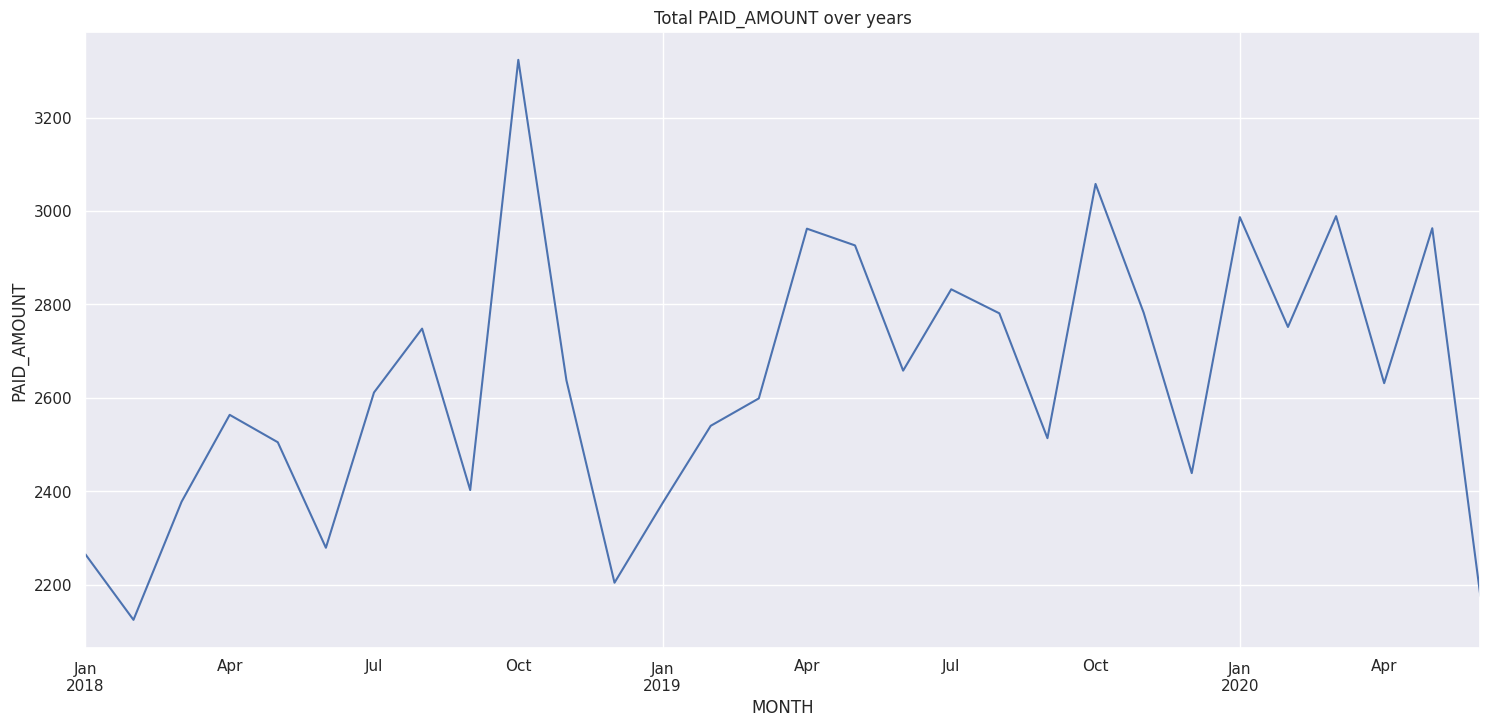

In [122]:
OS['PAID_AMOUNT'].plot()
plt.xlabel('MONTH')
plt.ylabel('PAID_AMOUNT')
plt.title('Total PAID_AMOUNT over years')
plt.show()

In [123]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['PAID_AMOUNT'] = OS['PAID_AMOUNT'].resample('MS').mean()

In [16]:

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8



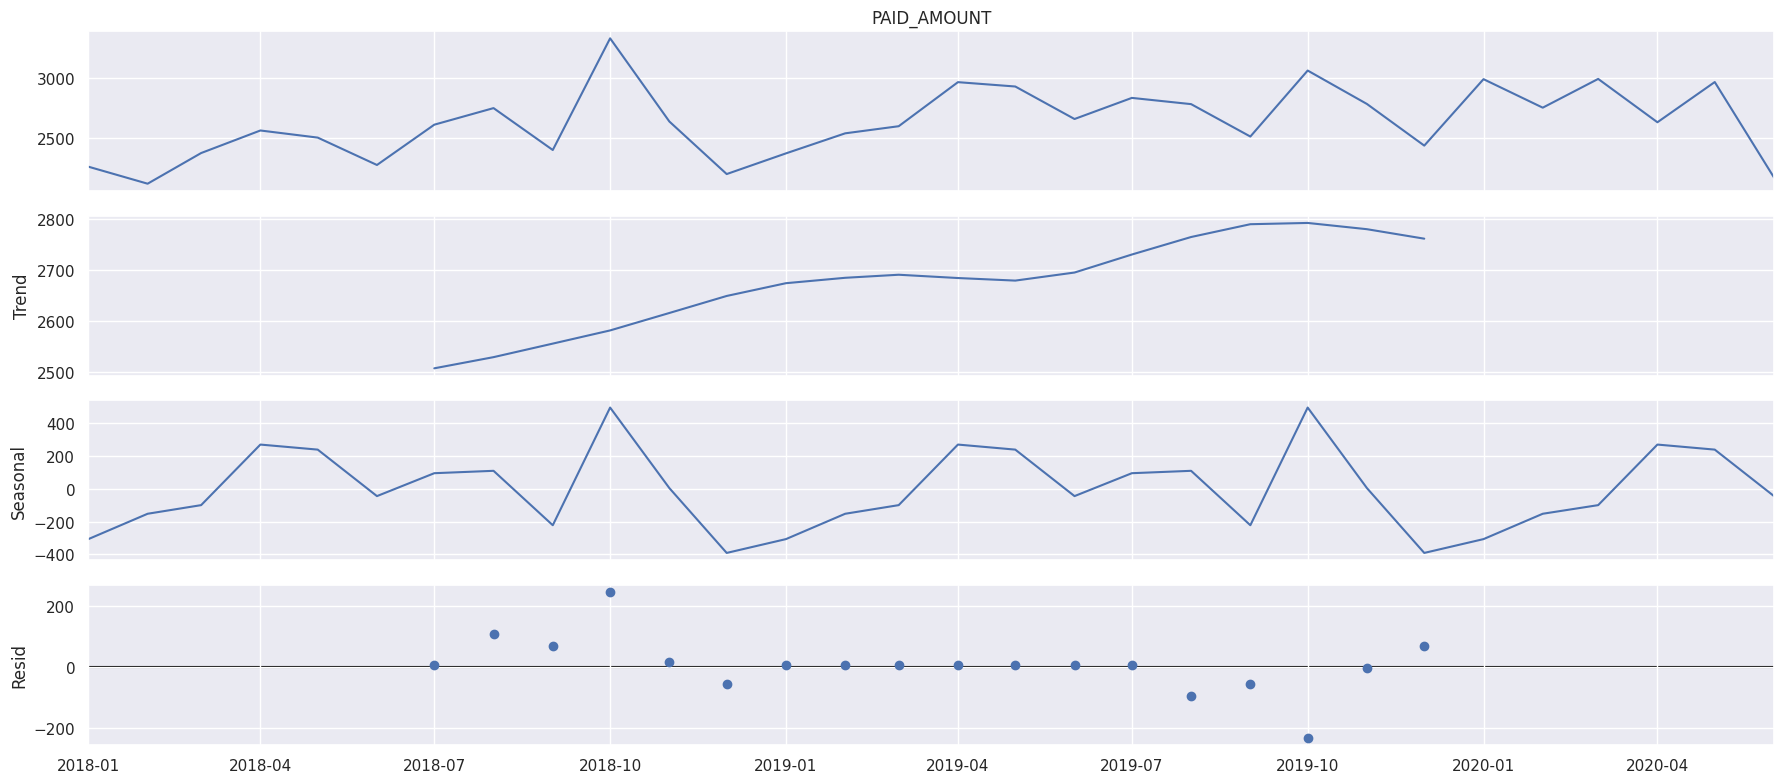

In [124]:
decomposition = sm.tsa.seasonal_decompose(monthly_OS['PAID_AMOUNT'], model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
# стационарность 

In [125]:
moving_avg = monthly_OS.rolling(12).mean()
moving_std= monthly_OS.rolling(12).std()

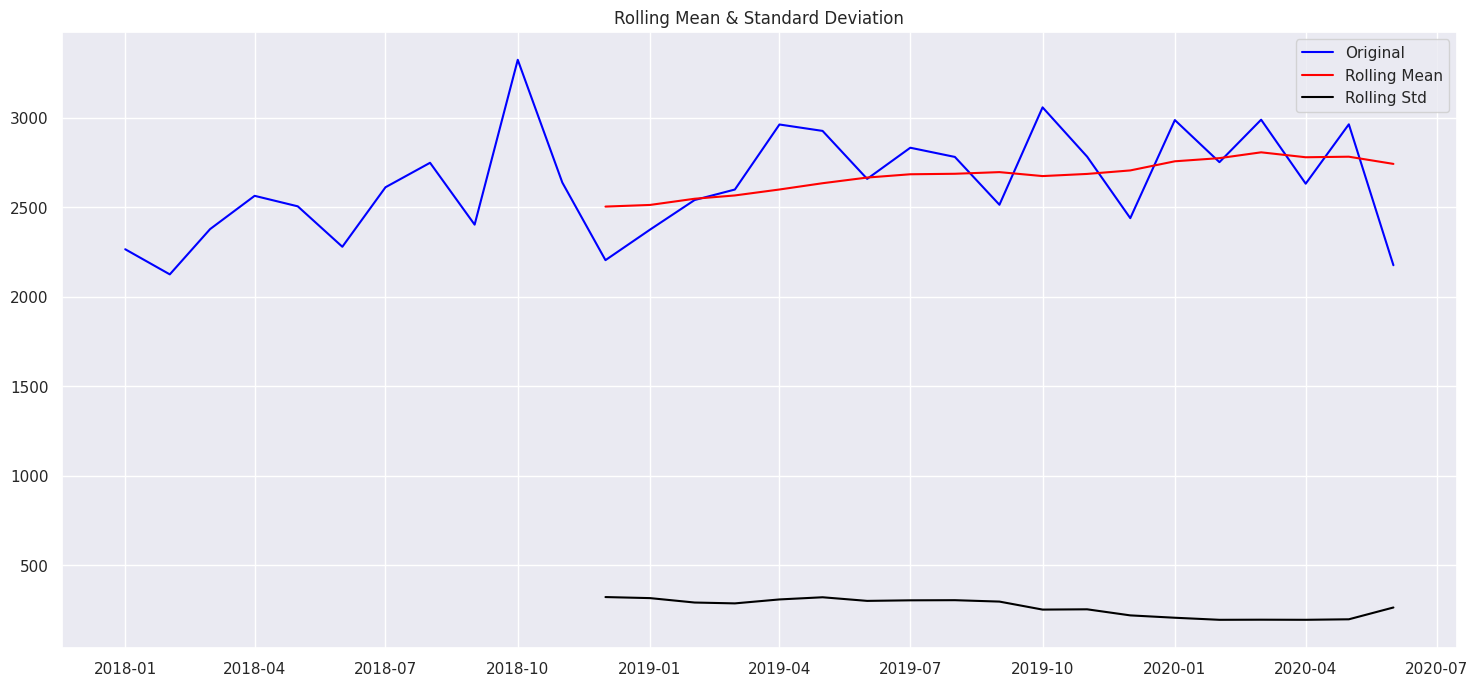

In [126]:
orig = plt.plot(monthly_OS, color='blue',label='Original')
mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
std = plt.plot(moving_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [127]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(monthly_OS, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -4.482985
p-value                         0.000211
#Lags Used                      0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


In [128]:


y = df['PAID_AMOUNT'].resample('MS').mean()
ts_log = np.log(y)
ts_log

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [7]:
pip install openpyxl

Looking in indexes: https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 38.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [129]:
do = pd.read_excel('/home/ekolodyazhnaya/claims_sample_data.xlsx')
do = do[do['MONTH'] != 201900]
do.MONTH = pd.to_datetime(do['MONTH'].astype(str), format='%Y%m')
do = do[do.MONTH != '2020-07-01']
store= do.loc[do['SERVICE_CATEGORY']=='SpecialistsFFS']
store = store[['PAID_AMOUNT', 'MONTH']]
store
store = store.groupby('MONTH')['PAID_AMOUNT'].mean().reset_index()
store
store = store.set_index('MONTH')
store.index
store.index = pd.to_datetime(store.index)

y = store['PAID_AMOUNT'].resample('MS').mean()

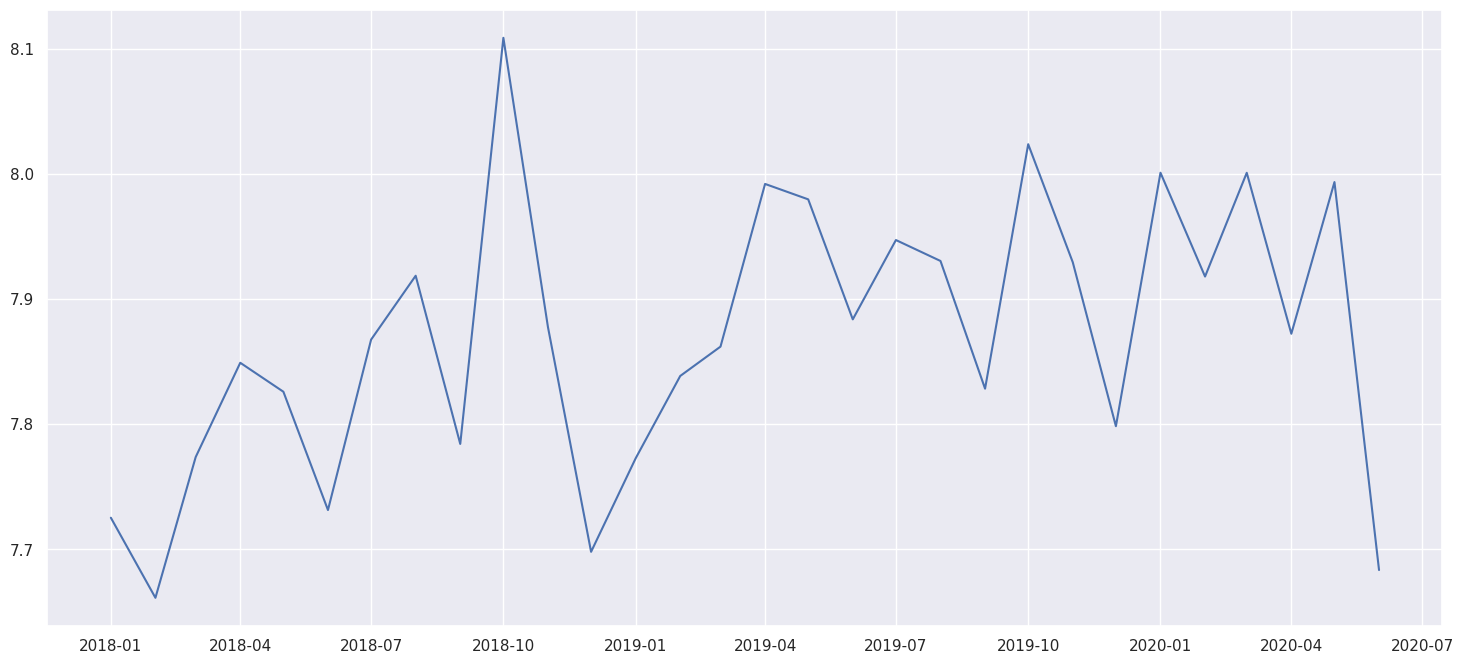

In [130]:
ts_log = np.log(y)
plt.plot(ts_log)

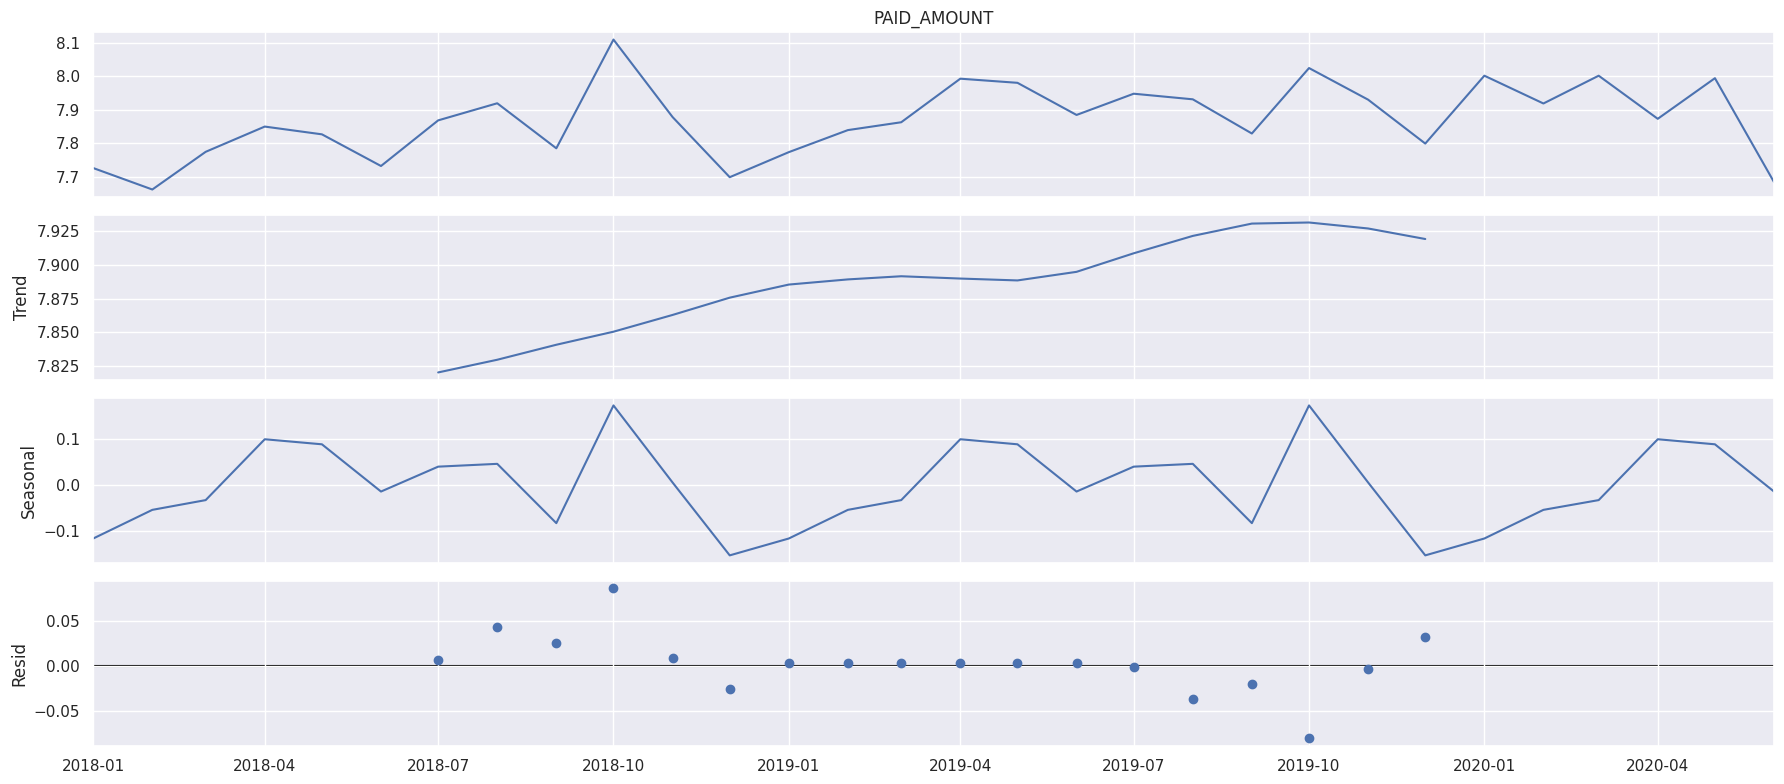

In [131]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(ts_log, model='additive')
fig = decomposition.plot()
plt.show()

In [26]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

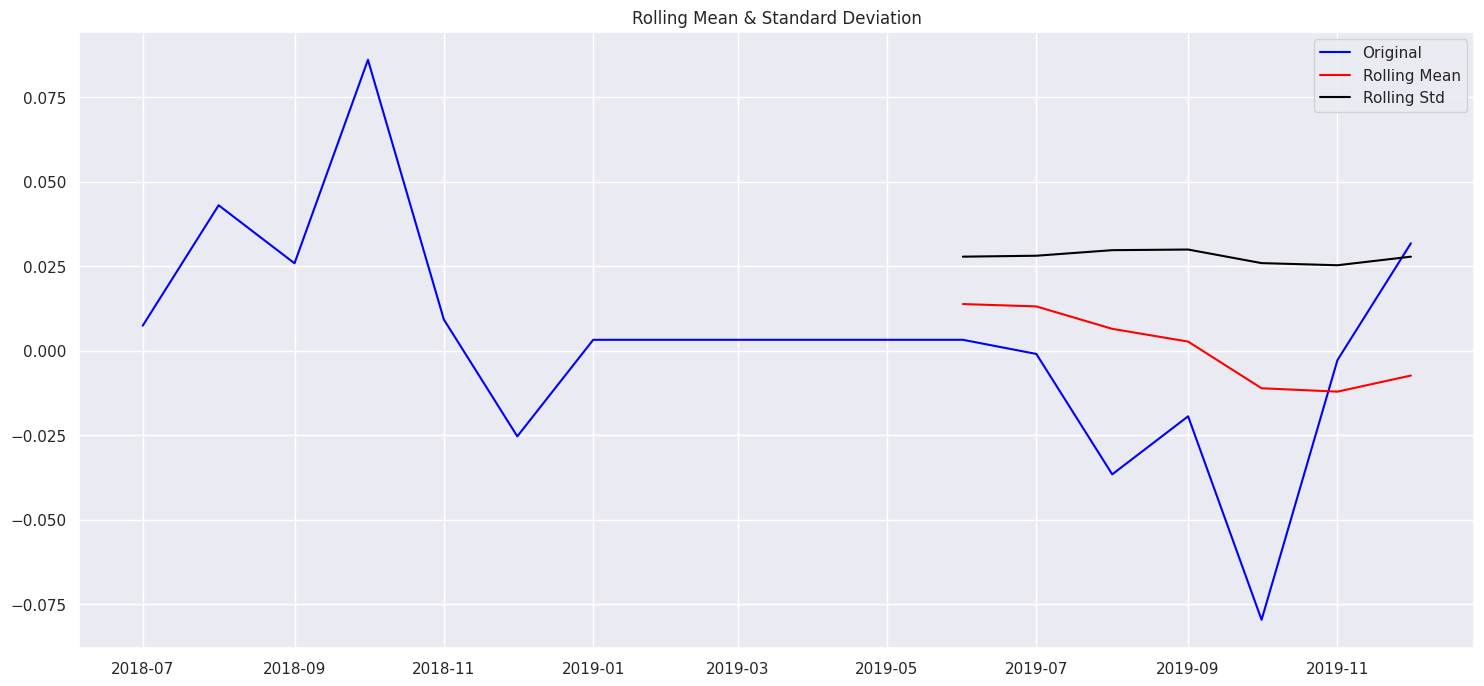

Results of Dickey-Fuller Test:
Test Statistic                 -1.016684
p-value                         0.747131
#Lags Used                      5.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [132]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)
residual = decomposition.resid

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

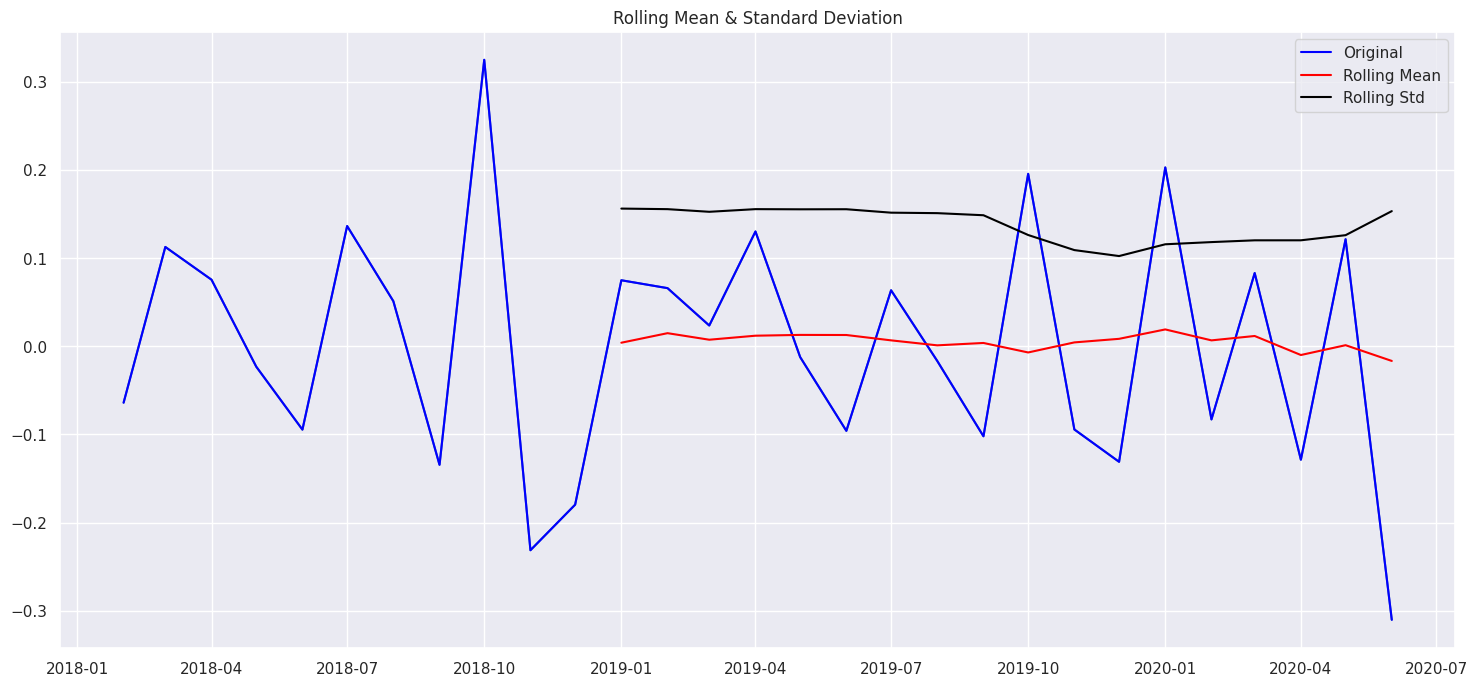

Results of Dickey-Fuller Test:
Test Statistic                 -4.005564
p-value                         0.001382
#Lags Used                      4.000000
Number of Observations Used    24.000000
Critical Value (1%)            -3.737709
Critical Value (5%)            -2.992216
Critical Value (10%)           -2.635747
dtype: float64


In [133]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

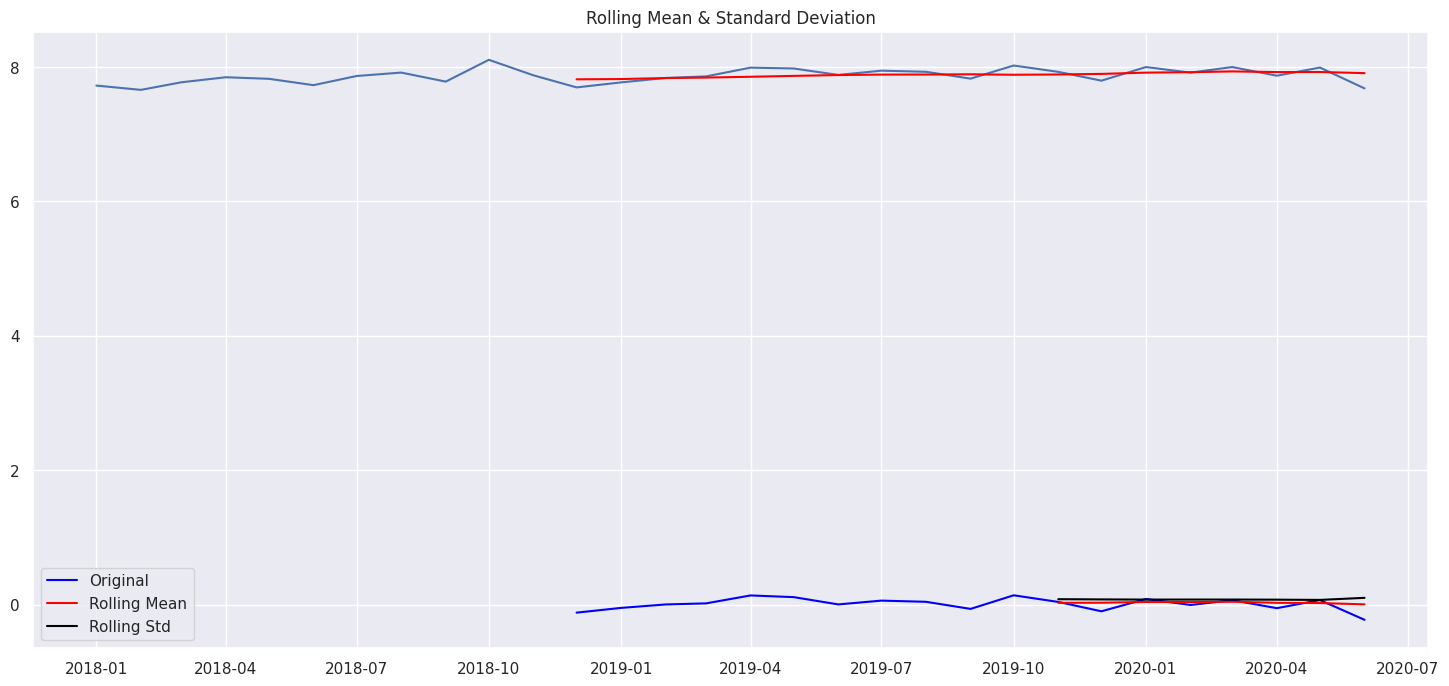

Results of Dickey-Fuller Test:
Test Statistic                 -4.134818
p-value                         0.000848
#Lags Used                      0.000000
Number of Observations Used    18.000000
Critical Value (1%)            -3.859073
Critical Value (5%)            -3.042046
Critical Value (10%)           -2.660906
dtype: float64


In [134]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [137]:
len(y)

30

In [135]:
train= y[:15]
test= y[15:]

In [99]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

Looking in indexes: https://artifactory.s.o3.ru/artifactory/api/pypi/pypi-virtual/simple


In [138]:
 auto_arima(train, test='adf',seasonal=True, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=207.215, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=204.303, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=200.538, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=201.606, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=199.204, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 0.983 seconds


ARIMA(order=(2, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [139]:
auto_arima(y,test='adf',       # use adftest to find optimal 'd'
                       # maximum p and q
                                 # frequency of series
                       # let model determine 'd'
                      seasonal=True,   # No Seasonality
                       

                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=442.466, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=430.091, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=420.605, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=419.616, Time=0.03 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=421.614, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=416.170, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=418.040, Time=0.21 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0]          
Total fit time: 1.464 seconds


ARIMA(order=(3, 2, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [140]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(1,1,1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            PAID_AMOUNT   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -100.610
Date:                Thu, 26 Oct 2023   AIC                            207.219
Time:                        10:13:10   BIC                            209.137
Sample:                    01-01-2018   HQIC                           207.042
                         - 03-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1257      0.533      0.236      0.814      -0.920       1.171
ma.L1         -0.7748      0.240     -3.224      0.001      -1.246      -0.304
sigma2       9.28e+04      3e+04      3.091      0.002     3.4e+04    1.52e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.68   Prob(JB):                         0.33
Heteroskedasticity (H):               1.32   Skew:                             0.79
Prob(H) (two-sided):                  0.77   Kurtosis:                         4.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
pred= model.predict(
    end=(len(y)-1),
    start=len(train),
    dynamic=True)
pred

2019-04-01    2546.341615
2019-05-01    2540.009101
2019-06-01    2539.213410
2019-07-01    2539.113431
2019-08-01    2539.100868
2019-09-01    2539.099289
2019-10-01    2539.099091
2019-11-01    2539.099066
2019-12-01    2539.099063
2020-01-01    2539.099063
2020-02-01    2539.099063
2020-03-01    2539.099063
2020-04-01    2539.099063
2020-05-01    2539.099063
2020-06-01    2539.099063
Freq: MS, Name: predicted_mean, dtype: float64

In [142]:
from  sklearn.metrics import mean_absolute_percentage_error

mape= mean_absolute_percentage_error(test, pred)

print('MAPE: %f' %mape)

MAPE: 0.101765


In [ ]:
# The lower the MAPE, the better the model is.

<Axes: xlabel='MONTH'>

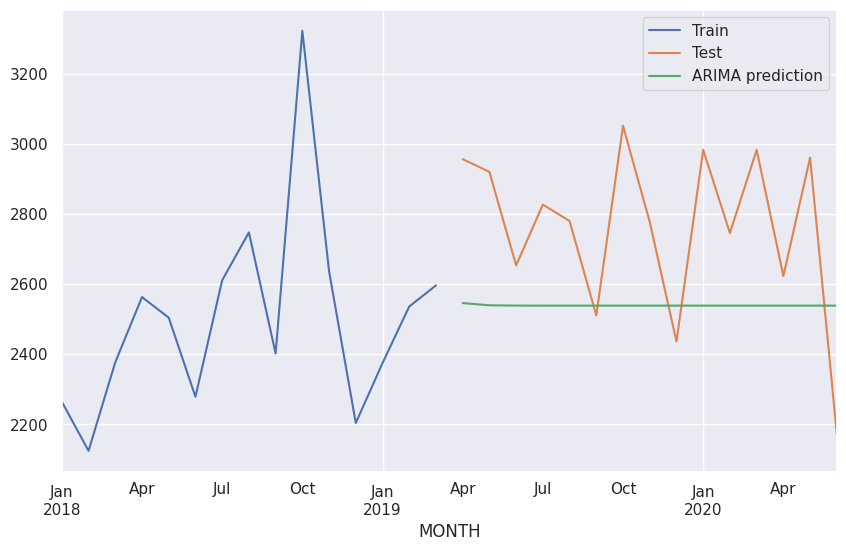

In [143]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pred.plot(legend=True, label='ARIMA prediction')

In [144]:
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(train,order=(1, 1, 1),seasonal_order=(1,1,1,12))

results=model1.fit()
results.summary()

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.35156D-01    |proj g|=  1.31094D-01

At iterate    5    f=  8.68703D-01    |proj g|=  1.29563D-02

At iterate   10    f=  8.66562D-01    |proj g|=  3.80561D-04

At iterate   15    f=  8.65877D-01    |proj g|=  4.95777D-03

At iterate   20    f=  8.44904D-01    |proj g|=  2.78949D-02

At iterate   25    f=  8.39725D-01    |proj g|=  1.20382D-03

At iterate   30    f=  8.39350D-01    |proj g|=  8.42277D-04

At iterate   35    f=  8.39272D-01    |proj g|=  7.28852D-04

At iterate   40    f=  8.39199D-01    |proj g|=  6.67391D-04

At iterate   45    f=  8.39163D-01    |proj g|=  7.24865D-04

At iterate   50    f=  8.39147D-01    |proj g|=  9.01034D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Early subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(
/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/statespace/mlemodel.py:3159: UserWarning: Later subset of data for variable 0 has too few non-missing observations to calculate test statistic.
  test_statistic, p_value = breakvar_heteroskedasticity_test(


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        PAID_AMOUNT   No. Observations:                   15
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 -12.587
Date:                            Thu, 26 Oct 2023   AIC                             35.174
Time:                                    10:13:33   BIC                             28.640
Sample:                                01-01-2018   HQIC                            21.509
                                     - 03-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9965      2.206     -0.452      0.652      -5.321       3.328
ma.L1          0.9155      7.313      0.125      0.900     -13.418      15.249
ar.S.L12       0.9692     36.477      0.027      0.979     -70.523      72.462
ma.S.L12       0.0045      6.264      0.001      0.999     -12.273      12.282
sigma2       370.6152      0.002   2.23e+05      0.000     370.612     370.618
===================================================================================
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.16   Prob(JB):                         0.85
Heteroskedasticity (H):                nan   Skew:                             0.00
Prob(H) (two-sided):                   nan   Kurtosis:                         1.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.02e+24. Standard errors may be unstable.
"""

In [145]:
pre=results.predict(start= len(train), end= (len(y)-1),dynamic=True)
pre

2019-04-01    3024.817563
2019-05-01    2724.836608
2019-06-01    2738.632838
2019-07-01    2831.947423
2019-08-01    3210.576330
2019-09-01    2621.803886
2019-10-01    3789.397984
2019-11-01    2858.178129
2019-12-01    2663.554534
2020-01-01    2588.871453
2020-02-01    3050.738847
2020-03-01    2916.557356
2020-04-01    3586.701803
2020-05-01    3045.345735
2020-06-01    3299.004763
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='MONTH'>

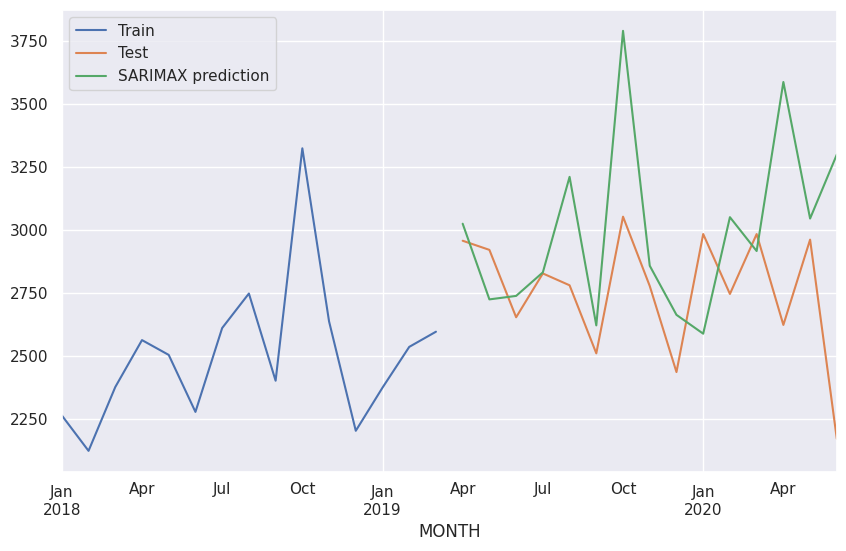

In [146]:
train.plot(legend=True, label='Train', figsize=(10,6))

test.plot(legend=True, label= 'Test')

pre.plot(legend=True, label='SARIMAX prediction')

In [147]:
mape= mean_absolute_percentage_error(test, pre)

print('MAPE1: %f' %mape)

MAPE1: 0.124363


In [148]:
future_sale= results.predict(start= len(y), end=(len(y)+12))
future_sale

2020-07-01    3153.004563
2020-08-01    3773.473687
2020-09-01    2941.706049
2020-10-01    4355.389094
2020-11-01    3179.301048
2020-12-01    3223.629114
2021-01-01    2903.476028
2021-02-01    3663.685325
2021-03-01    3333.861652
2021-04-01    4245.850104
2021-05-01    3463.344711
2021-06-01    3956.662255
2021-07-01    3571.559660
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: xlabel='MONTH'>

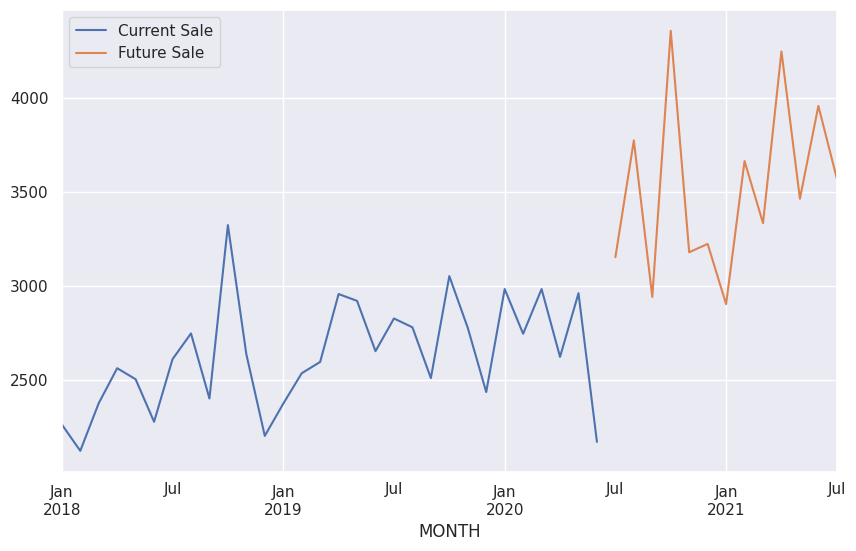

In [149]:
y.plot(legend=True, label='Current Sale', figsize=(10,6))

future_sale.plot(legend= True, label='Future Sale')

In [ ]:
df[df['SERVICE_CATEGORY']=='SpecialistsFFS']

In [ ]:
df_for_corr.corr()

In [ ]:
# среднее для каждой категории и покупателя
# корреляцию 
# поработать с датой, какие тренды 
# прогнать всё через регрессии
# построить прогноз 